In [1]:
from scipy.signal import fftconvolve, convolve2d
from astropy.io import fits
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import skew, kurtosis
%matplotlib inline

In [2]:
neural_output = "/home/gijs/Work/astro-pix2pix/test/meerkat16_deep2_split/fits/"
orignal_data = "/scratch/datasets/meerkat16_deep2_split/"

In [3]:
def render(a, imgdata, title):
    i = a.pcolor(imgdata, cmap='cubehelix')
    f.colorbar(i, ax=a)
    a.set_title(title)

In [4]:
def fits_open(f):
    return fits.open(f)[0].data.squeeze()

In [5]:
std_other = []
std_neural = []

for number in range(0, 360):
    input_path = "{}/{}-inputs.fits".format(neural_output, number)
    output_path = "{}/{}-outputs.fits".format(neural_output, number)
    residuals_path = "{}/{}-residuals.fits".format(neural_output, number)
    psf_path = "{}/{}-psf.fits".format(orignal_data, number)
    other_path = "{}/{}-skymodel.fits".format(orignal_data, number)

    psf = fits_open(psf_path)
    dirty = fits_open(input_path)
    residuals = fits_open(residuals_path)
    output = fits_open(output_path)
    other = fits_open(other_path)

    p = psf.shape[0]
    r = slice(p//2, -p//2+1)    # uneven PSF needs +2, even psf +1
    convolved_other = fftconvolve(other, psf, mode="full")[r,r]

    residual_other = dirty - convolved_other
    std_other.append(np.std(residual_other))
    std_neural.append(np.std(residuals))


In [21]:
number = 217
input_path = "{}/{}-inputs.fits".format(neural_output, number)
output_path = "{}/{}-outputs.fits".format(neural_output, number)
residuals_path = "{}/{}-residuals.fits".format(neural_output, number)
psf_path = "{}/{}-psf.fits".format(orignal_data, number)
other_path = "{}/{}-skymodel.fits".format(orignal_data, number)

psf = fits_open(psf_path)
dirty = fits_open(input_path)
residuals = fits_open(residuals_path)
output = fits_open(output_path)
other = fits_open(other_path)

p = psf.shape[0]
r = slice(p//2, -p//2+1)    # uneven PSF needs +2, even psf +1
convolved_other = fftconvolve(other, psf, mode="full")[r,r]
residual_other = dirty - convolved_other

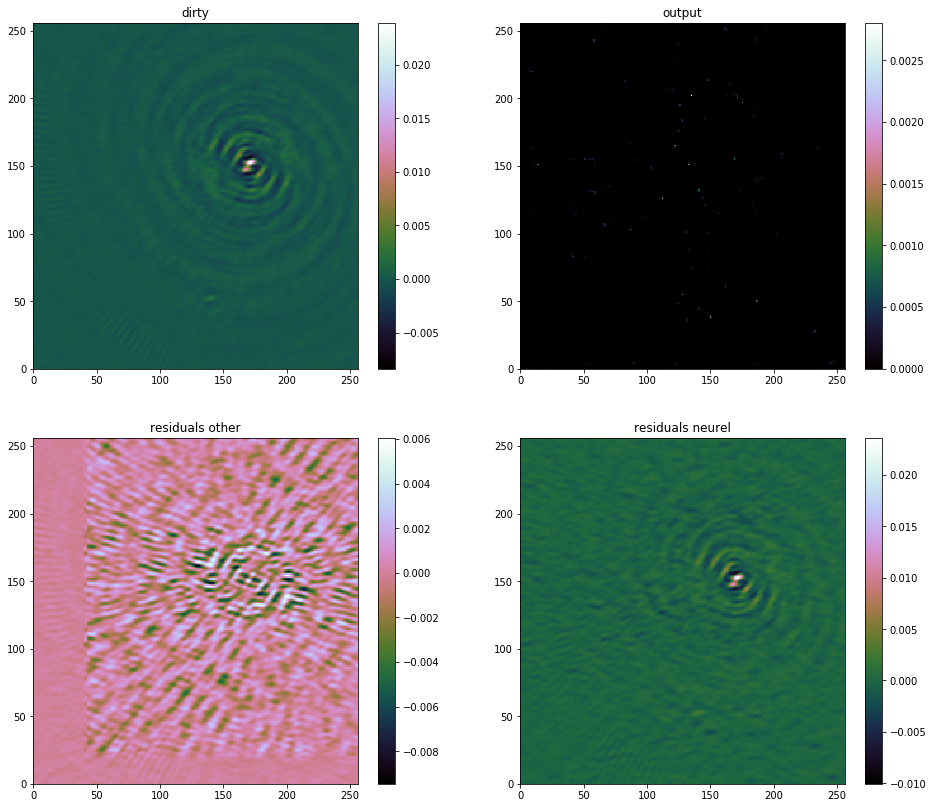

In [22]:
f, ((a1, a2), (a3, a4)) = plt.subplots(2, 2, figsize=(16,14))
render(a1, dirty, 'dirty')
render(a2, output, 'output')
render(a3, residual_other, 'residuals other')
render(a4, residuals, 'residuals neurel')

In [18]:
np.std(residual_other), np.std(residuals)

(5.643141220164388e-05, 0.00068905135)

In [20]:
std_other[number]

0.0011865675472130077

In [7]:
m = max(std_other + std_neural)

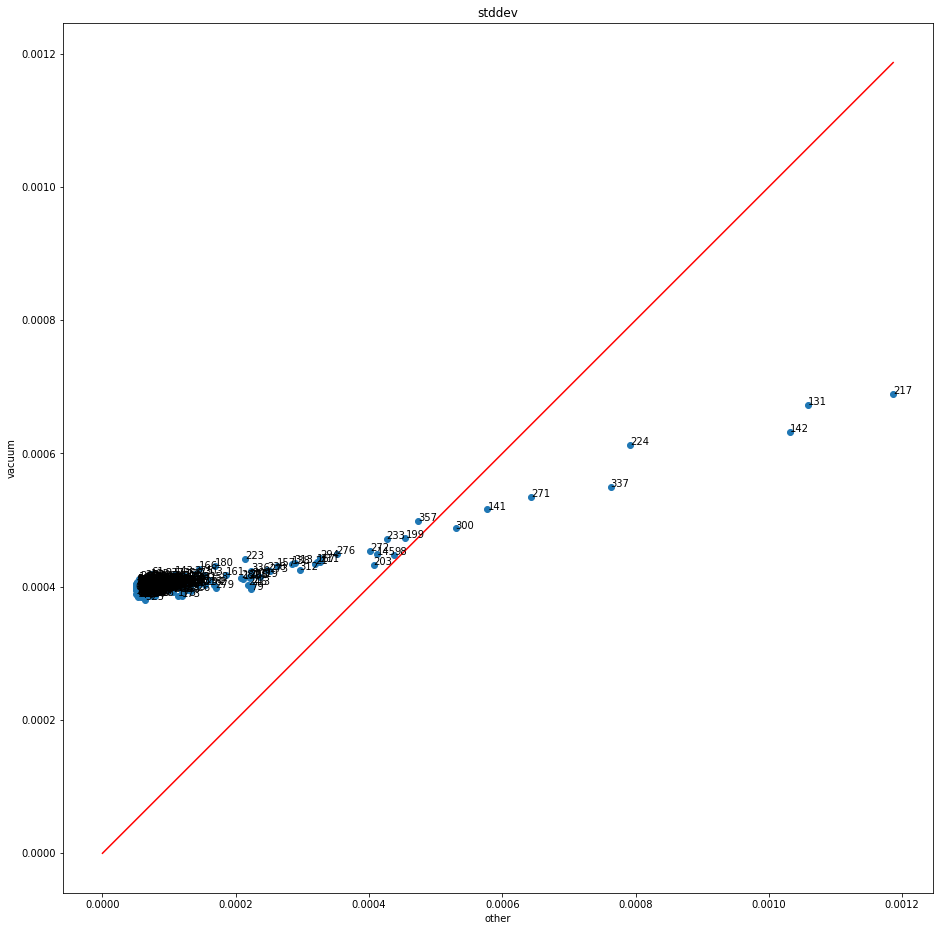

In [14]:
f, (a1) = plt.subplots(1, 1, figsize=(16,16))
a1.plot(std_other, std_neural, 'o')
a1.plot([0, m], [0, m], 'r-')
a1.set_xlabel('other')
a1.set_ylabel('vacuum')
a1.set_title('stddev')
a1.set_aspect('equal')
for i, txt in enumerate(range(360)):
    a1.annotate(txt, (std_other[i],std_neural[i]))